## Table of Contents

* [Homework# 2](#Homework#2)
    * [Histogram Plots](#Histograms)
    * [Mean and STD](#Mean_STD)
    * [Median and IQR](#Median_IQR)
    * [Bootstrap method](#Bootstrap_Method)
    
* Author: Gerti Kulla
* Class: Brooklyn College/Cisc7700X 
* Semester: Fall 2024

# Homework#2

CISC 7700X HW# 2: Continuing with the Iris dataset, plot the histograms for each of the attributes: sepal_length, sepal_width, petal_length, petal_width. Find the average and standard deveation for sepal_length, sepal_width, petal_length, petal_width for each label. Find the median and IQR for sepal_length, sepal_width, petal_length, petal_width for each label. Use bootstrap method to find error bounds on all of the above.

In [1]:
!pip install seaborn scipy
!pip install -U scikit-learn
!pip install statsmodels

import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.power import TTestIndPower 
from scipy.stats import bootstrap
%matplotlib inline

In [11]:
#Reading excel data into DataFrame
df = pd.read_csv(r'http://theparticle.com/cs/bc/dsci/iris.csv')

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]
Y = df['species'][1:] 

## Histograms

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

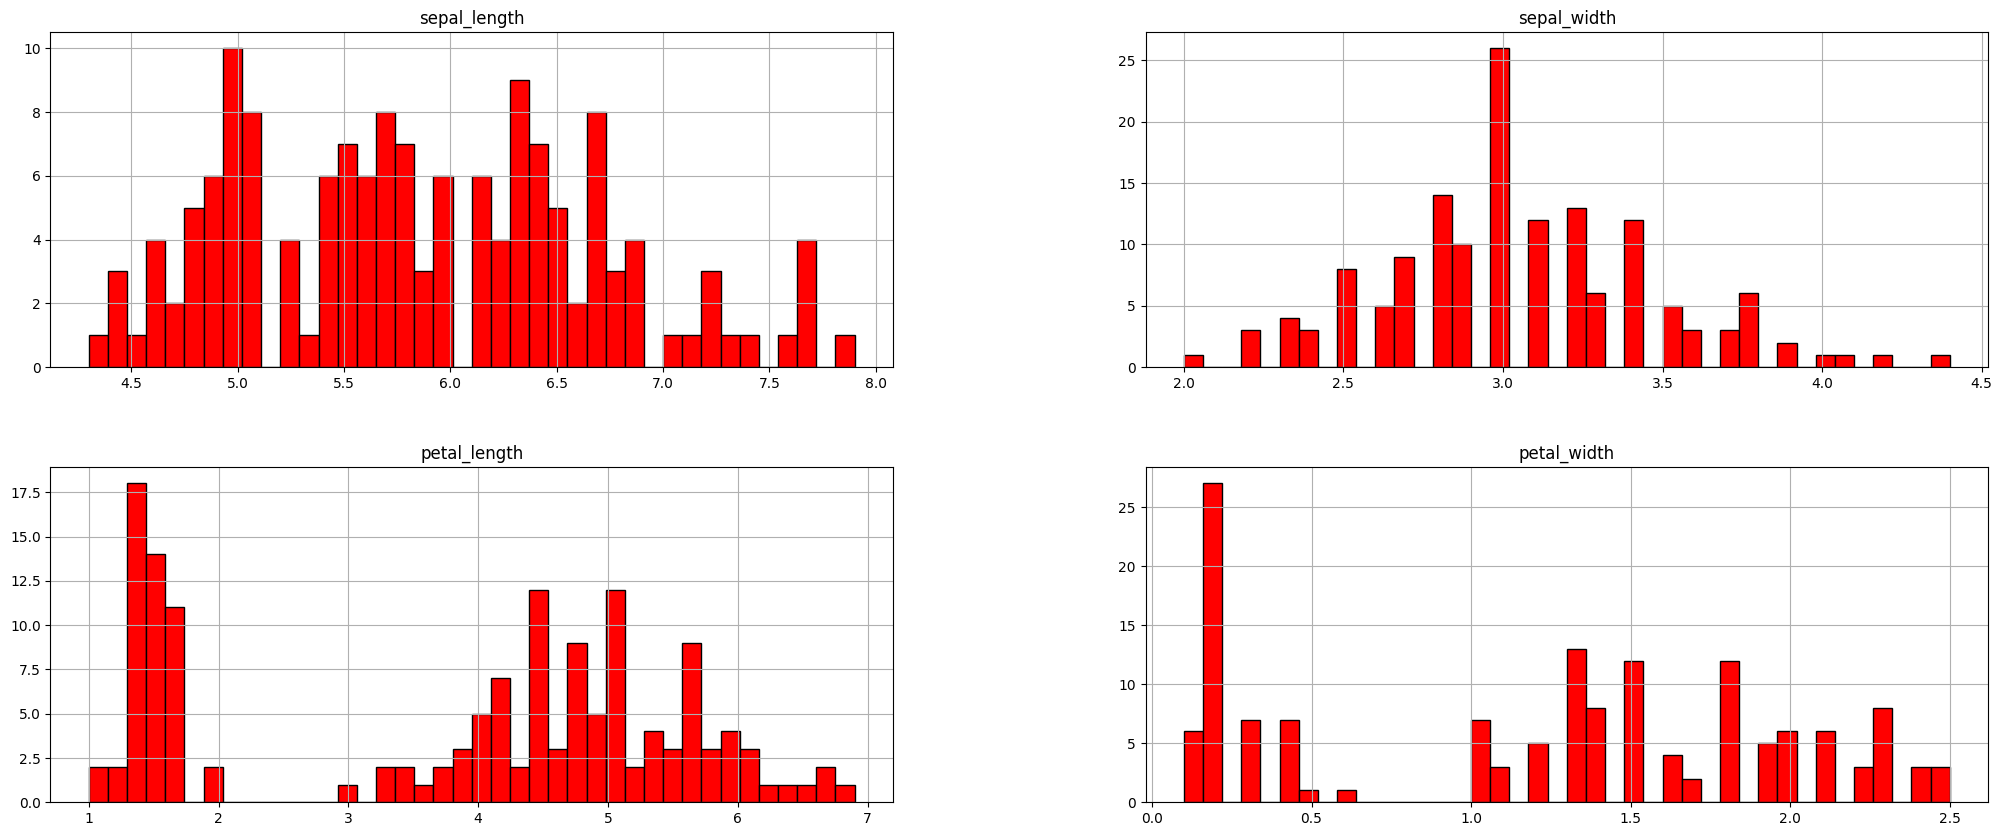

In [3]:
df_noHeader=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]
fig, axis = plt.subplots(2, 2, figsize = (25, 10))
df_noHeader.hist(ax=axis, color = "red", edgecolor='black', grid=True, bins = 40)

## Mean_STD

In [4]:
def Q1(x):
    return x.quantile(0.25)

def Q3(x):
    return x.quantile(0.75)

X_data = df[1:][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y_data = df[1:][['species']]
df_tot = pd.concat([X_data, Y_data], axis=1)

df_tot1 = df_tot.groupby('species').agg({'sepal_length': ['mean', 'std', 'median', Q1, Q3]})
df_tot2 = df_tot.groupby('species').agg({'sepal_width': ['mean', 'std', 'median', Q1, Q3]})
df_tot3 = df_tot.groupby('species').agg({'petal_length': ['mean', 'std', 'median', Q1, Q3]})
df_tot4 = df_tot.groupby('species').agg({'petal_width': ['mean', 'std', 'median', Q1, Q3]})
print(df_tot1, df_tot2, df_tot3, df_tot4)

           sepal_length                             
                   mean       std median     Q1   Q3
species                                             
setosa         5.004082  0.355879    5.0  4.800  5.2
versicolor     5.936000  0.516171    5.9  5.600  6.3
virginica      6.588000  0.635880    6.5  6.225  6.9            sepal_width                               
                  mean       std median     Q1     Q3
species                                              
setosa        3.416327  0.384787    3.4  3.100  3.700
versicolor    2.770000  0.313798    2.8  2.525  3.000
virginica     2.974000  0.322497    3.0  2.800  3.175            petal_length                             
                   mean       std median   Q1     Q3
species                                             
setosa         1.465306  0.175061   1.50  1.4  1.600
versicolor     4.260000  0.469911   4.35  4.0  4.600
virginica      5.552000  0.551895   5.55  5.1  5.875            petal_width                  

In [9]:
X_data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]

col_median = X_data.median()
col_std = X_data.std()
col_mean = X_data.mean()
col_quantile_25 = X_data.quantile(0.25)
col_quantile_75 = X_data.quantile(0.75)
IQR = col_quantile_75 - col_quantile_25
IQR

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [25]:
print(f"Mean & STD for Sepal-Length:\n{round((X['sepal_length'].describe().loc[['mean','std']]),4)}")

Mean & STD for Sepal-Length:
mean    5.8527
std     0.8289
Name: sepal_length, dtype: float64


In [26]:
print(f"Mean & STD for Sepal-Width:\n{round((X['sepal_width'].describe().loc[['mean','std']]),4)}")

Mean & STD for Sepal-Width:
mean    3.0527
std     0.4368
Name: sepal_width, dtype: float64


In [27]:
print(f"Mean & STD for Petal-Lenght:\n{round((X['petal_length'].describe().loc[['mean','std',]]),4)}")

Mean & STD for Petal-Lenght:
mean    3.7801
std     1.7628
Name: petal_length, dtype: float64


In [28]:
print(f"Mean & STD for Petal-Width:\n{round((X['petal_width'].describe().loc[['mean','std']]),4)}")

Mean & STD for Petal-Width:
mean    1.2068
std     0.7617
Name: petal_width, dtype: float64


## Median_IQR

In [29]:
print(f"Median for Sepal-Length: {X['sepal_length'].median():.2f}")

Median for Sepal-Length: 5.80


In [30]:
Q1_SL = X['sepal_length'].quantile(0.25)
Q3_SL = X['sepal_length'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(f"IQR for Sepal-Length: {round(IQR_SL,2)}")

IQR for Sepal-Length: 1.3


In [31]:
print(f"Median for Sepal-Lenght: {X['sepal_width'].median():.2f}")

Median for Sepal-Lenght: 3.00


In [32]:
Q1_SL = X['sepal_width'].quantile(0.25)
Q3_SL = X['sepal_width'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(f"IQRL for Sepal-Lenght: {round(IQR_SL,2)}")

IQRL for Sepal-Lenght: 0.5


In [34]:
print(f"Median for Petal-Lenght: {X['petal_length'].median():.2f}")

Median for Petal-Lenght: 4.40


In [36]:
Q1_SL = X['petal_length'].quantile(0.25)
Q3_SL = X['petal_length'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(f"IQR for Petal-Lenght: {IQR_SL:.2f}")

IQR for Petal-Lenght: 3.50


In [37]:
print(f"Median for Petal-Length: {X['petal_width'].median():.2f}")

Median for Petal-Length: 1.30


In [38]:
Q1_SL = X['petal_width'].quantile(0.25)
Q3_SL = X['petal_width'].quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
print(f"IQR for Petal-Width: {IQR_SL:.2f}")

IQR for Petal-Width: 1.50


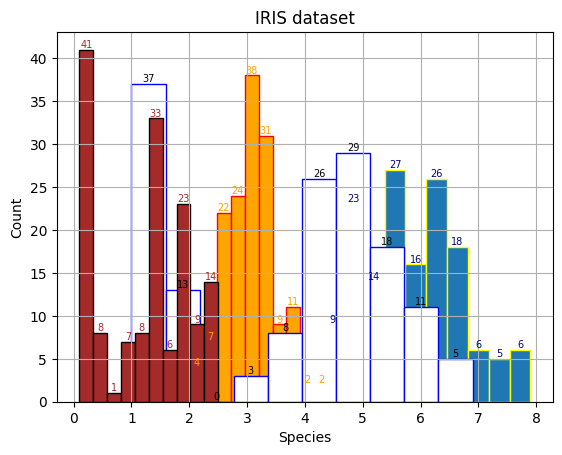

In [6]:
# Plot histogram of versicolor petal lengths
values, bins, bars = plt.hist(df['sepal_length'], edgecolor='yellow')
plt.bar_label(bars, fontsize=7, color='navy')
values, bins, bars = plt.hist(df['sepal_width'], edgecolor='red', color='orange')
plt.bar_label(bars, fontsize=7, color='orange')
values, bins, bars = plt.hist(df['petal_length'], edgecolor='blue', color='white')
plt.bar_label(bars, fontsize=7, color='black')
values, bins, bars = plt.hist(df['petal_width'], edgecolor='black', color='brown')
plt.bar_label(bars, fontsize=7, color='brown')
plt.xlabel("Species")
plt.ylabel("Count")
plt.title('IRIS dataset') 
plt.grid()
plt.show()

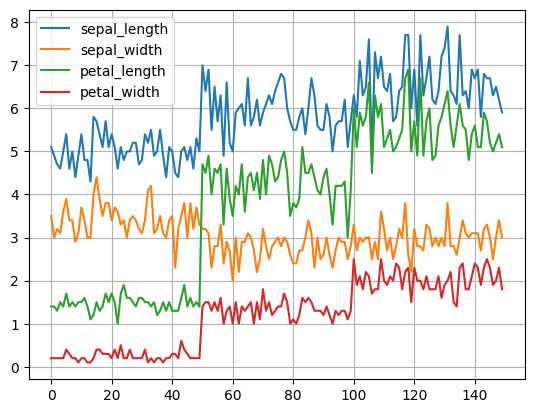

In [7]:
df.plot(kind='line', grid=True)
sys.stdout.flush()

## Bootstrap_Method

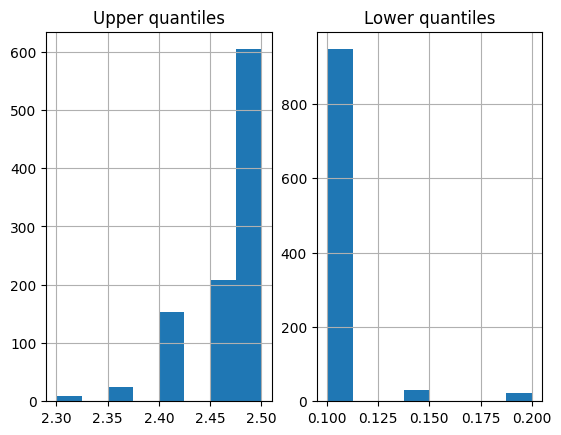

In [12]:
upperQ = []
lowerQ = []

x = X['petal_width']
subsample = x.sample(frac=1, replace=True)

for i in range(1000):
    subsample = x.sample(frac=1, replace=True)
    upperQ.append(subsample.quantile(0.99))
    lowerQ.append(subsample.quantile(0.01))

upperQ = pd.Series(upperQ)
lowerQ = pd.Series(lowerQ)

plt.subplot(1,2,1)
plt.title('Upper quantiles')
plt.hist(upperQ, bins = 8)
plt.grid()

plt.subplot(1,2,2)
plt.title('Lower quantiles') 
plt.hist(lowerQ, bins = 8)
plt.grid()

In [33]:
print("upper 0.99 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {upperQ.quantile(0.025):.2f} 97.5% quantile: {upperQ.quantile(0.975):.2f}")

print("lower 0.01 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {lowerQ.quantile(0.025):.2f} 97.5% quantile: {lowerQ.quantile(0.975):.2f}")

upper 0.99 quantile lies in this interval with 95% confidence
2.5% quantile: 2.36 97.5% quantile: 2.50
lower 0.01 quantile lies in this interval with 95% confidence
2.5% quantile: 0.10 97.5% quantile: 0.15


In [13]:
#using boostrap function
data = x.to_numpy()
data = (data,)

print("95% confidentce interval")
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95, random_state=1, method='percentile')

print(bootstrap_ci.confidence_interval)

95% confidentce interval
ConfidenceInterval(low=np.float64(0.7055415532639187), high=np.float64(0.8043851367927933))


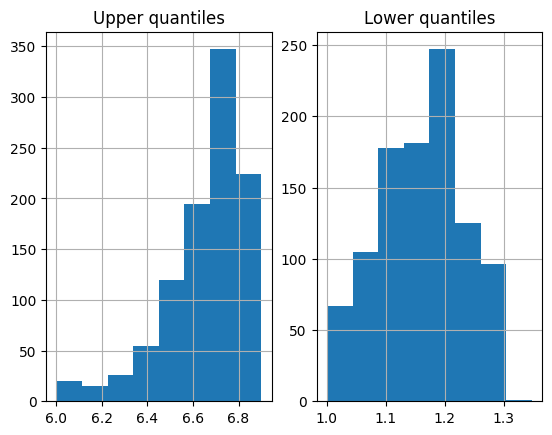

In [14]:
upperQ = []
lowerQ = []

x = X['petal_length']
subsample = x.sample(frac=1, replace=True)

for i in range(1000):
    subsample = x.sample(frac=1, replace=True)
    upperQ.append(subsample.quantile(0.99))
    lowerQ.append(subsample.quantile(0.01))

upperQ = pd.Series(upperQ)
lowerQ = pd.Series(lowerQ)

plt.subplot(1,2,1)
plt.title('Upper quantiles')
plt.hist(upperQ, bins = 8)
plt.grid()

plt.subplot(1,2,2)
plt.title('Lower quantiles') 
plt.hist(lowerQ, bins = 8)
plt.grid()

In [36]:
print("upper 0.99 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {upperQ.quantile(0.025):.2f} 97.5% quantile: {upperQ.quantile(0.975):.2f}")

print("lower 0.01 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {lowerQ.quantile(0.025):.2f} 97.5% quantile: {lowerQ.quantile(0.975):.2f}")

upper 0.99 quantile lies in this interval with 95% confidence
2.5% quantile: 6.21 97.5% quantile: 6.90
lower 0.01 quantile lies in this interval with 95% confidence
2.5% quantile: 1.00 97.5% quantile: 1.30


In [48]:
#using boostrap function
data = x.to_numpy()
data = (data,)

print("95% confidentce interval")
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95,random_state=1, method='percentile')

print(bootstrap_ci.confidence_interval)

95% confidentce interval
ConfidenceInterval(low=np.float64(1.6335884088763204), high=np.float64(1.856727786596656))


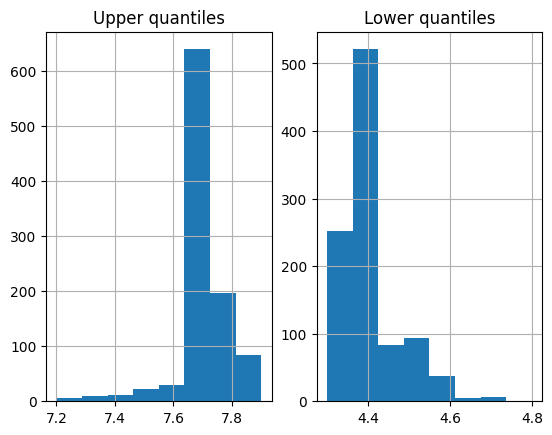

In [43]:
upperQ = []
lowerQ = []

x = X['sepal_length']
subsample = x.sample(frac=1, replace=True)

for i in range(1000):
    subsample = x.sample(frac=1, replace=True)
    upperQ.append(subsample.quantile(0.99))
    lowerQ.append(subsample.quantile(0.01))

upperQ = pd.Series(upperQ)
lowerQ = pd.Series(lowerQ)

plt.subplot(1,2,1)
plt.title('Upper quantiles')
plt.hist(upperQ, bins = 8)
plt.grid()

plt.subplot(1,2,2)
plt.title('Lower quantiles') 
plt.hist(lowerQ, bins = 8)
plt.grid()

In [44]:
print("upper 0.99 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {upperQ.quantile(0.025):.2f} 97.5% quantile: {upperQ.quantile(0.975):.2f}")

print("lower 0.01 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {lowerQ.quantile(0.025):.2f} 97.5% quantile: {lowerQ.quantile(0.975):.2f}")

upper 0.99 quantile lies in this interval with 95% confidence
2.5% quantile: 7.42 97.5% quantile: 7.90
lower 0.01 quantile lies in this interval with 95% confidence
2.5% quantile: 4.30 97.5% quantile: 4.60


In [45]:
data = x.to_numpy()
data = (data,)

print("95% confidentce interval")
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95,random_state=1, method='percentile')

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=np.float64(0.7425576169413477), high=np.float64(0.9027013860058574))


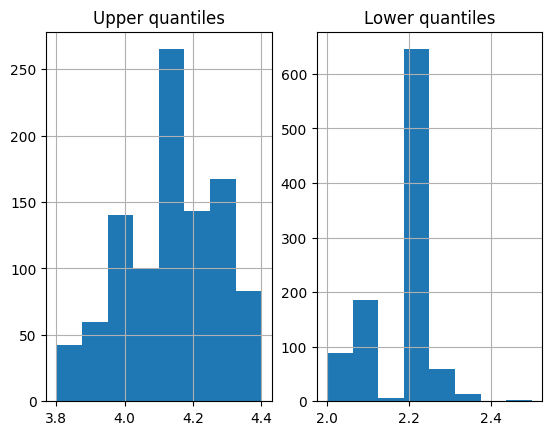

In [49]:
upperQ = []
lowerQ = []

x = X['sepal_width']
subsample = x.sample(frac=1, replace=True)

for i in range(1000):
    subsample = x.sample(frac=1, replace=True)
    upperQ.append(subsample.quantile(0.99))
    lowerQ.append(subsample.quantile(0.01))

upperQ = pd.Series(upperQ)
lowerQ = pd.Series(lowerQ)

plt.subplot(1,2,1)
plt.title('Upper quantiles')
plt.hist(upperQ, bins = 8)
plt.grid()

plt.subplot(1,2,2)
plt.title('Lower quantiles') 
plt.hist(lowerQ, bins = 8)
plt.grid()

In [50]:
print("upper 0.99 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {upperQ.quantile(0.025):.2f} 97.5% quantile: {upperQ.quantile(0.975):.2f}")

print("lower 0.01 quantile lies in this interval with 95% confidence")
print(f"2.5% quantile: {lowerQ.quantile(0.025):.2f} 97.5% quantile: {lowerQ.quantile(0.975):.2f}")

upper 0.99 quantile lies in this interval with 95% confidence
2.5% quantile: 3.86 97.5% quantile: 4.40
lower 0.01 quantile lies in this interval with 95% confidence
2.5% quantile: 2.00 97.5% quantile: 2.30


In [51]:
#using boostrap function
data = x.to_numpy()
data = (data,)

print("95% confidentce interval")
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95,random_state=1, method='percentile')

print(bootstrap_ci.confidence_interval)

95% confidentce interval
ConfidenceInterval(low=np.float64(0.379883631082617), high=np.float64(0.4863384125694891))
